<a href="https://colab.research.google.com/github/luc-sol-2048/dw_matrix_road_sign/blob/master/day4_m3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import datetime
import matplotlib.pyplot as plt


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Dense,Flatten,Dropout
from tensorflow.keras.utils import to_categorical
from skimage import color,exposure
from sklearn.metrics import accuracy_score

%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [34]:
cd '/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign/'

/content/drive/My Drive/Colab Notebooks/dw_matrix/matrix_three/dw_matrix_road_sign


In [0]:
train = pd.read_pickle('./data/train.p')
X_train, y_train = train['features'], train['labels']

In [0]:
test = pd.read_pickle('./data/test.p')
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim ==1 : y_train = to_categorical(y_train)

In [38]:
y_train.shape

(34799, 43)

In [0]:
if y_test.ndim ==1 : y_test = to_categorical(y_test)

In [40]:
y_test.shape

(4410, 43)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [42]:
model = Sequential([
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape = input_shape),
    Flatten(),
    Dense(num_classes, activation='softmax'),
]
)

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
model.fit(X_train,y_train)



1088/1088 [==============================] - 3s 3ms/step - loss: 15.2515 - accuracy: 0.7567


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
      Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape = input_shape),
      Flatten(),
      Dense(num_classes, activation='softmax'),
  ]
  )

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics = ['accuracy'])
  
  logdir = os.path.join('logs',datetime.datetime.now().strftime('%Y%m%f-%H%M%S'))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir,histogram_freq=1)
  
  model.fit(
      X_train,
      y_train,
      batch = params_fit.get('batch_size',128),
      epochs = params_fit.get('epochs',5),
      verbpse = params_fit.get('verbose',1),
      validation_data = params_fit.get('validation_data',(X_train, y_train)),
      callbacks = [tensorboard_callback]
      
  )
  
  return model


In [44]:
model = get_cnn_v1(input_shape,num_classes)
model_trained = train_model(model,X_train,y_train)

Epoch 1/5
1088/1088 [==============================] - 7s 6ms/step - loss: 11.9774 - accuracy: 0.7806 - val_loss: 0.3326 - val_accuracy: 0.9247
Epoch 2/5
1088/1088 [==============================] - 7s 6ms/step - loss: 0.3366 - accuracy: 0.9252 - val_loss: 0.2412 - val_accuracy: 0.9488
Epoch 3/5
1088/1088 [==============================] - 7s 6ms/step - loss: 0.2491 - accuracy: 0.9473 - val_loss: 0.1788 - val_accuracy: 0.9550
Epoch 4/5
1088/1088 [==============================] - 7s 6ms/step - loss: 0.2527 - accuracy: 0.9468 - val_loss: 0.1258 - val_accuracy: 0.9714
Epoch 5/5
1088/1088 [==============================] - 7s 6ms/step - loss: 0.1971 - accuracy: 0.9591 - val_loss: 0.1454 - val_accuracy: 0.9661


In [0]:
df = pd.read_csv('./data/signnames.csv')
sign_labels = df.to_dict()['b']


In [0]:
def train_and_predict(model):
  model_trained = train_model(model,X_train,y_train)
  return predict_model(model_trained,X_test,y_test)


In [0]:
def predict_model(model_trained, X_test,y_test,scoring=accuracy_score):
  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm,y_pred)

In [52]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
      Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = input_shape),
      MaxPool2D(),
      Dropout(0.3),
      
      Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      MaxPool2D(),
      Dropout(0.3),
            
      Flatten(),
      Dense(1024,activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax'),
  ]
  )
train_and_predict(get_cnn_v2(input_shape, num_classes))

Epoch 1/5
1088/1088 [==============================] - 7s 6ms/step - loss: 2.2125 - accuracy: 0.6284 - val_loss: 0.2818 - val_accuracy: 0.9216
Epoch 2/5
1088/1088 [==============================] - 7s 7ms/step - loss: 0.4807 - accuracy: 0.8576 - val_loss: 0.1367 - val_accuracy: 0.9641
Epoch 3/5
1088/1088 [==============================] - 7s 7ms/step - loss: 0.3644 - accuracy: 0.8943 - val_loss: 0.1467 - val_accuracy: 0.9627
Epoch 4/5
1088/1088 [==============================] - 7s 6ms/step - loss: 0.3321 - accuracy: 0.9070 - val_loss: 0.0772 - val_accuracy: 0.9802
Epoch 5/5
1088/1088 [==============================] - 7s 6ms/step - loss: 0.3417 - accuracy: 0.9071 - val_loss: 0.0737 - val_accuracy: 0.9768


0.9179138321995465

In [56]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
      Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = input_shape),
      Conv2D(filters=32,kernel_size=(3,3),activation='relu'),
      MaxPool2D(),
      Dropout(0.3),
      
      Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      MaxPool2D(),
      Dropout(0.3),
            
      Flatten(),
      Dense(1024,activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax'),
  ]
  )
train_and_predict(get_cnn_v3(input_shape, num_classes))

Epoch 1/5
1088/1088 [==============================] - 8s 7ms/step - loss: 1.2929 - accuracy: 0.7040 - val_loss: 0.1118 - val_accuracy: 0.9712
Epoch 2/5
1088/1088 [==============================] - 8s 7ms/step - loss: 0.2743 - accuracy: 0.9191 - val_loss: 0.0543 - val_accuracy: 0.9855
Epoch 3/5
1088/1088 [==============================] - 8s 7ms/step - loss: 0.1928 - accuracy: 0.9445 - val_loss: 0.0398 - val_accuracy: 0.9898
Epoch 4/5
1088/1088 [==============================] - 8s 7ms/step - loss: 0.1472 - accuracy: 0.9573 - val_loss: 0.0171 - val_accuracy: 0.9949
Epoch 5/5
1088/1088 [==============================] - 8s 7ms/step - loss: 0.1434 - accuracy: 0.9595 - val_loss: 0.0278 - val_accuracy: 0.9931


0.9648526077097506

In [58]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
      Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = input_shape),
      Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
      MaxPool2D(),
      Dropout(0.3),
      
      Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
      Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      MaxPool2D(),
      Dropout(0.3),
      
      Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
      Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      MaxPool2D(),
      Dropout(0.3),
            
      Flatten(),
      Dense(1024,activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax'),
  ]
  )

train_and_predict(get_cnn_v4(input_shape, num_classes))

Epoch 1/5
1088/1088 [==============================] - 9s 8ms/step - loss: 1.7656 - accuracy: 0.4968 - val_loss: 0.3819 - val_accuracy: 0.8874
Epoch 2/5
1088/1088 [==============================] - 8s 8ms/step - loss: 0.5096 - accuracy: 0.8415 - val_loss: 0.1286 - val_accuracy: 0.9621
Epoch 3/5
1088/1088 [==============================] - 8s 8ms/step - loss: 0.3338 - accuracy: 0.8971 - val_loss: 0.0815 - val_accuracy: 0.9773
Epoch 4/5
1088/1088 [==============================] - 8s 8ms/step - loss: 0.2658 - accuracy: 0.9212 - val_loss: 0.0618 - val_accuracy: 0.9823
Epoch 5/5
1088/1088 [==============================] - 8s 8ms/step - loss: 0.2450 - accuracy: 0.9290 - val_loss: 0.0400 - val_accuracy: 0.9889


0.963718820861678

In [61]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
      Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape = input_shape),
      Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
      MaxPool2D(),
      Dropout(0.3),
      
      Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
      Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      MaxPool2D(),
      Dropout(0.3),
      
      Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
      Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
      MaxPool2D(),
      Dropout(0.3),
            
      Flatten(),

      Dense(1024,activation='relu'),
      Dropout(0.3),

      Dense(1024,activation='relu'),
      Dropout(0.3),

      Dense(num_classes, activation='softmax'),
  ]
  )

train_and_predict(get_cnn_v5(input_shape, num_classes))

Epoch 1/5
1088/1088 [==============================] - 9s 8ms/step - loss: 1.9175 - accuracy: 0.4396 - val_loss: 0.4305 - val_accuracy: 0.8605
Epoch 2/5
1088/1088 [==============================] - 9s 8ms/step - loss: 0.5767 - accuracy: 0.8224 - val_loss: 0.2022 - val_accuracy: 0.9423
Epoch 3/5
1088/1088 [==============================] - 9s 8ms/step - loss: 0.3569 - accuracy: 0.8936 - val_loss: 0.1530 - val_accuracy: 0.9526
Epoch 4/5
1088/1088 [==============================] - 9s 8ms/step - loss: 0.3301 - accuracy: 0.9085 - val_loss: 0.0903 - val_accuracy: 0.9736
Epoch 5/5
1088/1088 [==============================] - 9s 8ms/step - loss: 0.2929 - accuracy: 0.9201 - val_loss: 0.0607 - val_accuracy: 0.9818


0.9668934240362812

In [0]:
X_train_gray = color.rgb2gray( X_train ).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray( X_test ).reshape(-1,32,32,1)

In [68]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train)
predict_model(model_trained, X_test_gray, y_test)

Epoch 1/5
1088/1088 [==============================] - 9s 8ms/step - loss: 1.9237 - accuracy: 0.4418 - val_loss: 0.3236 - val_accuracy: 0.8955
Epoch 2/5
1088/1088 [==============================] - 9s 8ms/step - loss: 0.3646 - accuracy: 0.8849 - val_loss: 0.1463 - val_accuracy: 0.9499
Epoch 3/5
1088/1088 [==============================] - 9s 8ms/step - loss: 0.2107 - accuracy: 0.9356 - val_loss: 0.0518 - val_accuracy: 0.9837
Epoch 4/5
1088/1088 [==============================] - 9s 8ms/step - loss: 0.1685 - accuracy: 0.9504 - val_loss: 0.0522 - val_accuracy: 0.9859
Epoch 5/5
1088/1088 [==============================] - 9s 8ms/step - loss: 0.1438 - accuracy: 0.9575 - val_loss: 0.0318 - val_accuracy: 0.9904


0.972108843537415

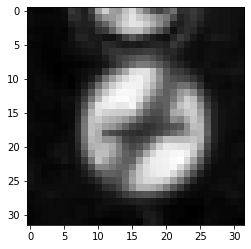

In [65]:
plt.imshow(color.rgb2gray( X_train[0] ), cmap=plt.get_cmap('gray'))